In [1]:
import imageio

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib.patches import Patch

## Loading the data

In [2]:
population_female = pd.read_csv("./data/population_absolute_female.csv", index_col=None)
population_male = pd.read_csv("./data/population_absolute_male.csv", index_col=None)

population_ratio_female = pd.read_csv("./data/population_ratio_female.csv", index_col=None)
population_ratio_male = pd.read_csv("./data/population_ratio_male.csv", index_col=None)

In [3]:
population_male.head()

,country_name,country_code,indicator_name,indicator_code,1960,1961,1962,1963,1964,1965,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Africa Eastern and Southern,AFE,00-04,SP.POP.0004.MA,11903046.0,12271309.0,12661185.0,13062183.0,13473056.0,13898075.0,...,69262823.0,69799942.0,70328645.0,70838797.0,71326134.0,71806458.0,72276800.0,72721045.0,73144973.0,73536015.0
1,Africa Eastern and Southern,AFE,05-09,SP.POP.0509.MA,9269956.0,9547953.0,9837633.0,10138780.0,10457881.0,10793159.0,...,65314592.0,65963380.0,66587445.0,67184988.0,67759240.0,68320639.0,68863966.0,69398995.0,69915906.0,70410300.0
2,Africa Eastern and Southern,AFE,10-14,SP.POP.1014.MA,7827606.0,8020790.0,8228078.0,8455835.0,8700624.0,8962290.0,...,61311446.0,62061903.0,62792350.0,63507605.0,64214165.0,64894977.0,65545401.0,66171283.0,66770763.0,67347033.0
3,Africa Eastern and Southern,AFE,15-19,SP.POP.1519.MA,6464521.0,6684830.0,6916635.0,7145770.0,7371925.0,7587183.0,...,57034077.0,57806078.0,58571021.0,59340852.0,60118991.0,60886123.0,61636532.0,62367046.0,63082447.0,63789187.0
4,Africa Eastern and Southern,AFE,20-24,SP.POP.2024.MA,5452406.0,5586353.0,5725665.0,5879098.0,6056915.0,6258724.0,...,52008135.0,52991456.0,53929992.0,54793181.0,55592277.0,56371721.0,57142679.0,57906587.0,58675188.0,59451883.0


In [4]:
population_ratio_female.head()

,country_name,country_code,indicator_name,indicator_code,1960,1961,1962,1963,1964,1965,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Africa Eastern and Southern,AFE,00-04,SP.POP.0004.FE.5Y,9.014516,9.048876,9.085330,9.118915,9.145269,9.169095,...,6.124783,6.054692,5.986170,5.918474,5.851166,5.785513,5.721320,5.657239,5.593823,5.530290
1,Africa Eastern and Southern,AFE,05-09,SP.POP.0509.FE.5Y,7.057922,7.070335,7.084839,7.101929,7.122660,7.145765,...,5.794240,5.740702,5.686691,5.632233,5.577727,5.523974,5.470572,5.418372,5.366651,5.315106
2,Africa Eastern and Southern,AFE,10-14,SP.POP.1014.FE.5Y,5.937633,5.925758,5.919400,5.922582,5.931015,5.939711,...,5.444618,5.406864,5.368548,5.330210,5.292437,5.253753,5.213893,5.173465,5.132426,5.091233
3,Africa Eastern and Southern,AFE,15-19,SP.POP.1519.FE.5Y,4.972357,4.997922,5.022545,5.039234,5.046655,5.045880,...,5.069443,5.041420,5.013618,4.986925,4.961474,4.935804,4.909721,4.883032,4.856166,4.829755
4,Africa Eastern and Southern,AFE,20-24,SP.POP.2024.FE.5Y,4.280373,4.271031,4.258456,4.250189,4.252597,4.265265,...,4.644751,4.640576,4.633008,4.620106,4.603193,4.585586,4.567994,4.550522,4.533925,4.518417


## Creating a first age distribution chart

In [5]:
FEMALE_COLOR = "red"
MALE_COLOR = "blue"

In [6]:
def create_age_distribution(female_df, male_df, country, year):
    df_f = female_df[female_df.country_name == country].loc[::-1]
    df_m = male_df[male_df.country_name == country].loc[::-1]
    
    ax = sns.barplot(y=df_m["indicator_name"], x=df_m[year] * -1, orient="h", color=MALE_COLOR)
    ax = sns.barplot(y=df_f["indicator_name"], x=df_f[year], orient="h", color=FEMALE_COLOR)
    
    return ax

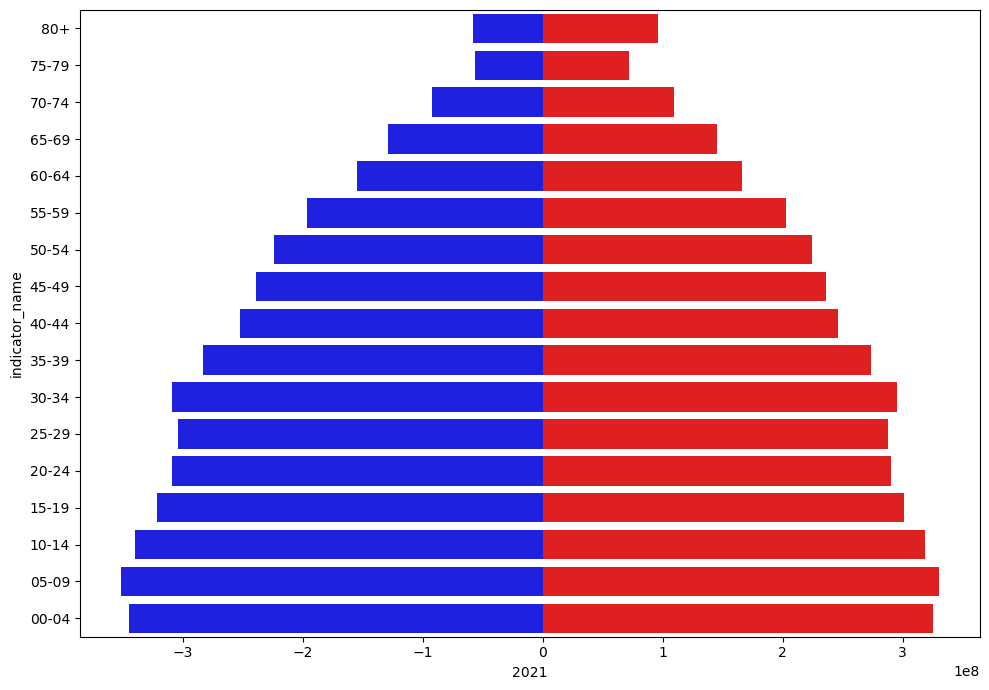

In [7]:
fig = plt.figure(figsize=(10, 7))

ax = create_age_distribution(
    female_df=population_female,
    male_df=population_male,
    country="World",
    year="2021"
)

plt.tight_layout()
plt.show()

## Creating a Seaborn style

In [8]:
def set_seaborn_style(font_family, background_color, grid_color, text_color):
    sns.set_style({
        "axes.facecolor": background_color,
        "figure.facecolor": background_color,

        "axes.labelcolor": text_color,

        "axes.edgecolor": grid_color,
        "axes.grid": True,
        "axes.axisbelow": True,

        "grid.color": grid_color,

        "font.family": font_family,
        "text.color": text_color,
        "xtick.color": text_color,
        "ytick.color": text_color,

        "xtick.bottom": False,
        "xtick.top": False,
        "ytick.left": False,
        "ytick.right": False,

        "axes.spines.left": False,
        "axes.spines.bottom": True,
        "axes.spines.right": False,
        "axes.spines.top": False,
    }
)

In [9]:
FEMALE_COLOR = "#F64740"
MALE_COLOR = "#05B2DC"

In [10]:
font_family="PT Mono"
background_color="#253D5B"
grid_color="#355882"
text_color="#EEEEEE"

set_seaborn_style(font_family, background_color, grid_color, text_color)

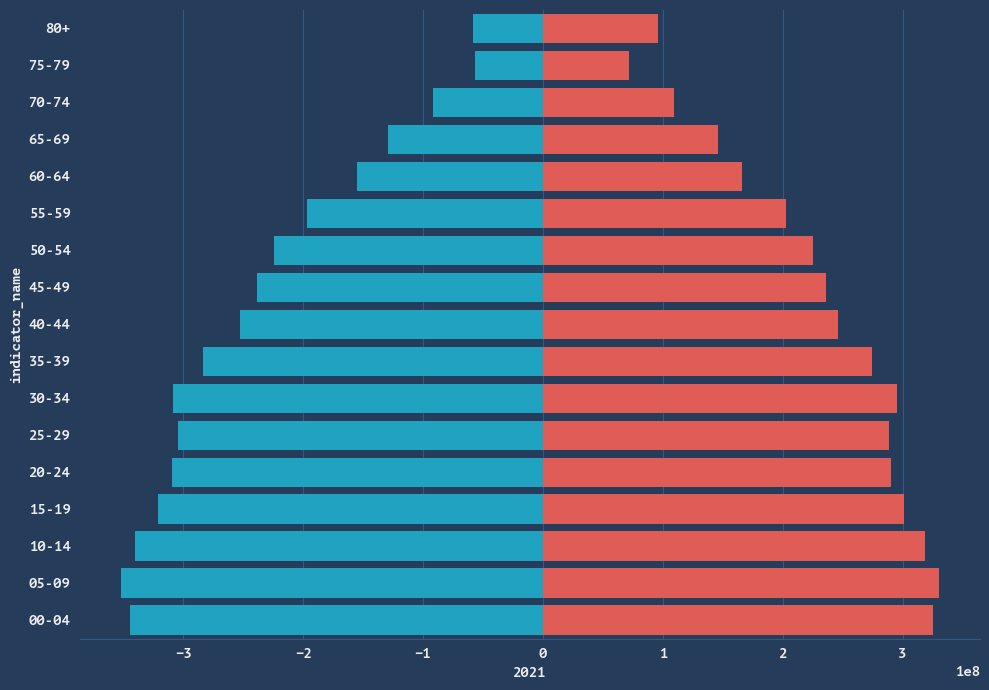

In [11]:
fig = plt.figure(figsize=(10, 7))

ax = create_age_distribution(
    female_df=population_female,
    male_df=population_male,
    country="World",
    year="2021"
)

plt.tight_layout()
plt.show()

## Improving the axes

In [12]:
def create_x_labels(ax, xformat):
    if xformat == "billions":
        return ["{}B".format(round(abs(x / 1e9))) for x in ax.get_xticks()[1:-1]]
    elif xformat == "millions":
        return ["{}M".format(round(abs(x / 1e6))) for x in ax.get_xticks()[1:-1]]
    elif xformat == "thousands":
        return ["{}K".format(round(abs(x / 1e3))) for x in ax.get_xticks()[1:-1]]
    elif xformat == "percentage":
        return ["{}%".format(round(abs(x), 1)) for x in ax.get_xticks()[1:-1]]
        

def format_ticks(ax, xformat, xlim=(None, None)):
    ax.tick_params(axis="x", labelsize=12, pad=8)
    ax.tick_params(axis="y", labelsize=12)
    ax.set(ylabel=None, xlabel=None, xlim=xlim)
    
    plt.xticks(
        ticks=ax.get_xticks()[1:-1],
        labels=create_x_labels(ax, xformat)
    )

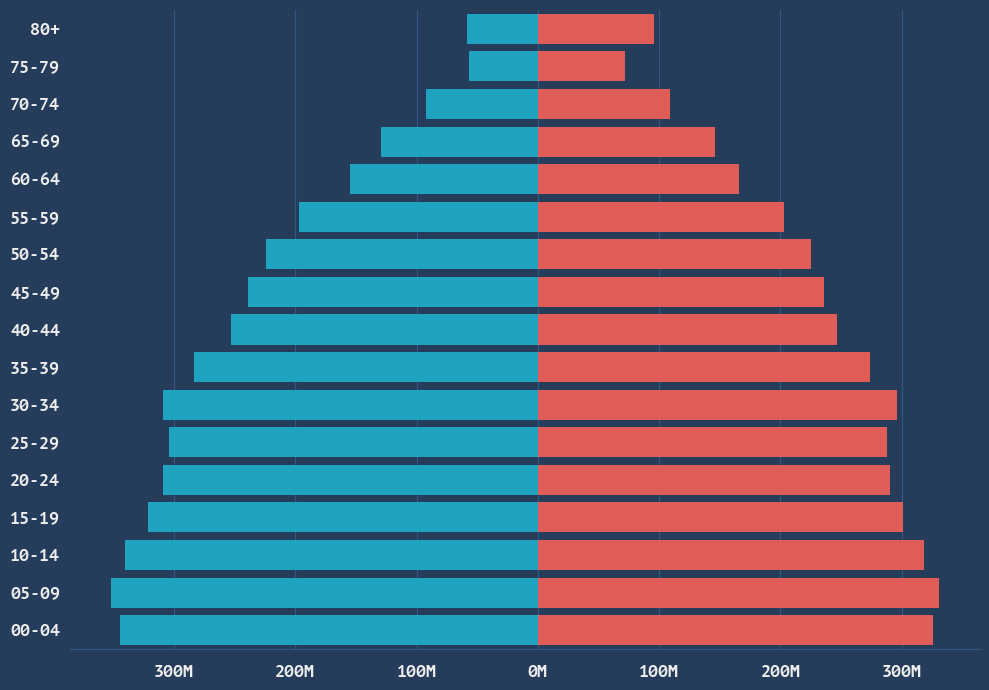

In [13]:
fig = plt.figure(figsize=(10, 7))

ax = create_age_distribution(
    female_df=population_female,
    male_df=population_male,
    country="World",
    year="2021"
)

# New functions
format_ticks(ax, xformat="millions")

plt.tight_layout()
plt.show()

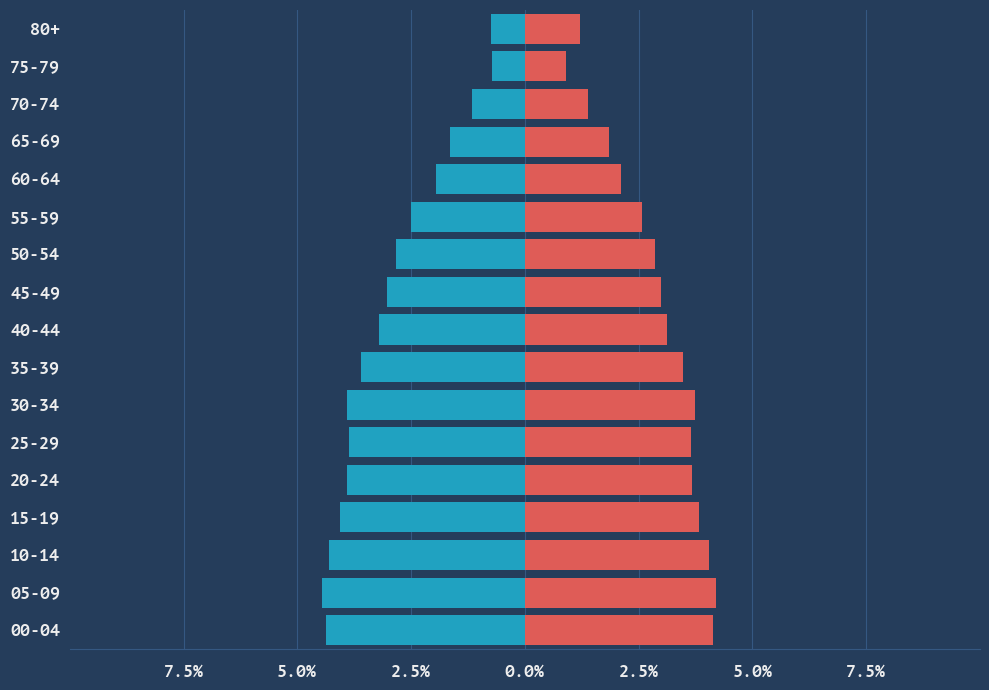

In [14]:
fig = plt.figure(figsize=(10, 7))

ax = create_age_distribution(
    female_df=population_ratio_female,
    male_df=population_ratio_male,
    country="World",
    year="2021"
)

# New functions
format_ticks(ax, xformat="percentage", xlim=(-10, 10))

plt.tight_layout()
plt.show()

## Adding a title and a legend

In [15]:
def add_legend(x, y): 
    patches = [
        Patch(color=MALE_COLOR, label="Male"),
        Patch(color=FEMALE_COLOR, label="Female")
    ]
    
    leg = plt.legend(
        handles=patches,
        bbox_to_anchor=(x, y), loc='center',
        ncol=2, fontsize=15,
        handlelength=1, handleheight=0.4,
        edgecolor=background_color
    )

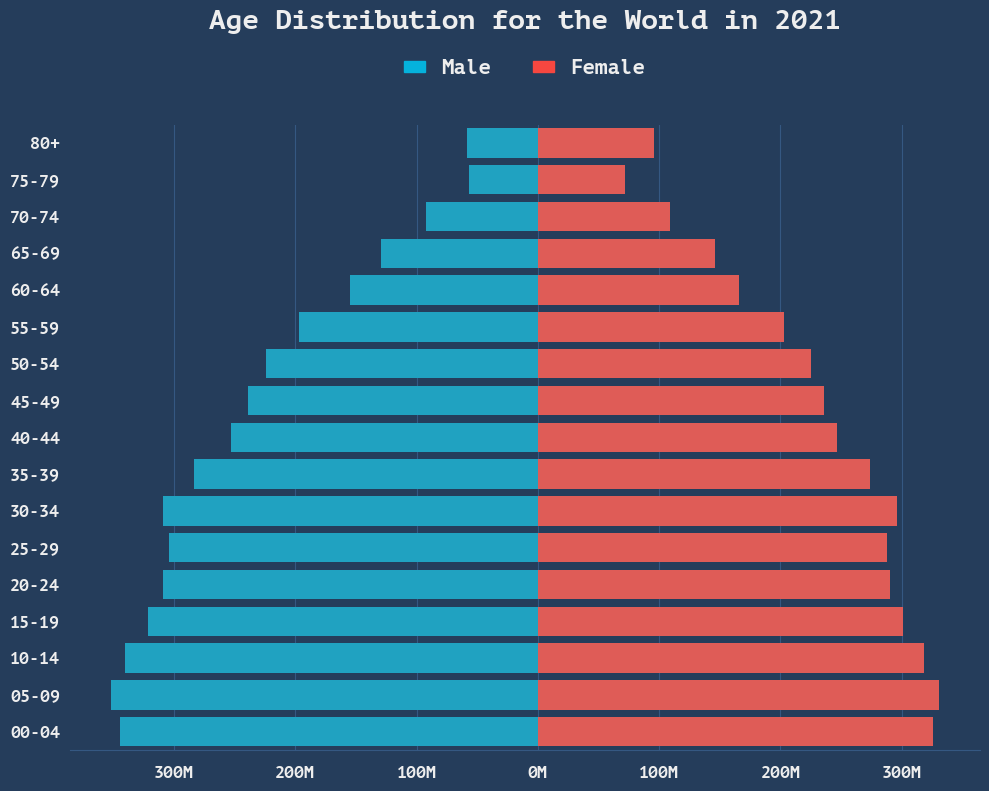

In [16]:
fig = plt.figure(figsize=(10, 8))

ax = create_age_distribution(
    female_df=population_female,
    male_df=population_male,
    country="World",
    year="2021"
)

# New functions
format_ticks(ax, xformat="millions")
add_legend(x=0.5, y=1.09)
plt.title("Age Distribution for the World in 2021", y=1.14, fontsize=20)

plt.tight_layout()
plt.show()

## Creating a PIL image and adding padding

In [17]:
def create_image_from_figure(fig):
    plt.tight_layout()
    
    fig.canvas.draw()
    data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    data = data.reshape((fig.canvas.get_width_height()[::-1]) + (3,))
    plt.close() 
    
    return Image.fromarray(data)

def add_padding_to_chart(chart, left, top, right, bottom, background):
    size = chart.size
    image = Image.new("RGB", (size[0] + left + right, size[1] + top + bottom), background)
    image.paste(chart, (left, top))
    return image

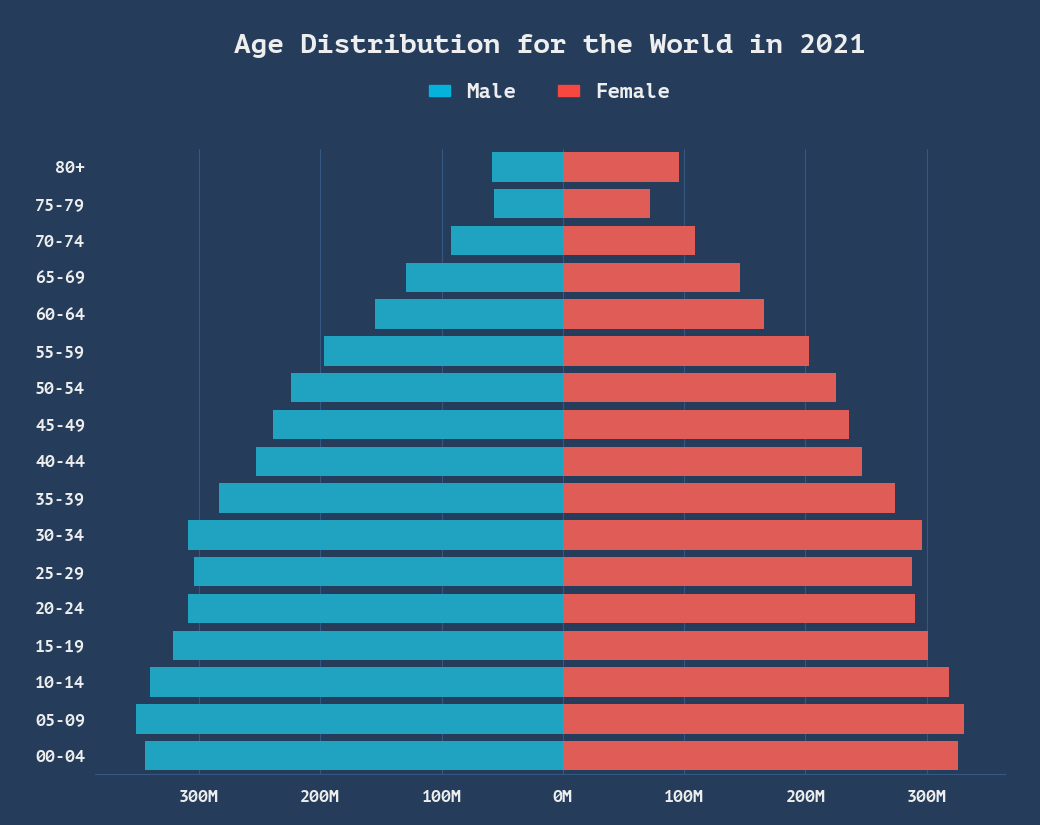

In [18]:
fig = plt.figure(figsize=(10, 8))

ax = create_age_distribution(
    female_df=population_female,
    male_df=population_male,
    country="World",
    year="2021"
)

# New functions
format_ticks(ax, xformat="millions")
add_legend(x=0.5, y=1.09)
plt.title("Age Distribution for the World in 2021", y=1.14, fontsize=20)

image = create_image_from_figure(fig)
image = add_padding_to_chart(image, 20, 20, 20, 5, background_color)

image

## Creating grids

In [19]:
def create_grid(figures, pad, ncols):
    nrows = int(len(figures) / ncols)
    size = figures[0].size

    image = Image.new(
        "RGBA",
        (ncols * size[0] + (ncols - 1) * pad, nrows * size[1] + (nrows - 1) * pad),
        "#ffffff00"
    )

    for i, figure in enumerate(figures):
        col, row = i % ncols, i // ncols
        image.paste(figure, (col * (size[0] + pad), row * (size[1] + pad)))

    return image

In [20]:
figures = []

for country in [
    "United States", "China", "Japan", "Brazil", "Canada",
    "Germany", "Pakistan", "Russian Federation", "Nigeria", 
    "Sweden", "Cambodia", "Saudi Arabia", "Iceland",
    "Spain", "South Africa", "Morocco"
]:

    fig = plt.figure(figsize=(10, 8))

    ax = create_age_distribution(
        female_df=population_ratio_female,
        male_df=population_ratio_male,
        country=country,
        year="2021"
    )
    
    ax.set(xlim=(-10, 10))

    # New functions
    format_ticks(ax, xformat="percentage")
    add_legend(x=0.5, y=1.09)
    plt.title("Age Distribution for {} in 2021".format(country), y=1.14, fontsize=20)

    image = create_image_from_figure(fig)
    image = add_padding_to_chart(image, 20, 20, 20, 5, background_color)
    
    figures.append(image)
    
grid = create_grid(figures, pad=20, ncols=4)

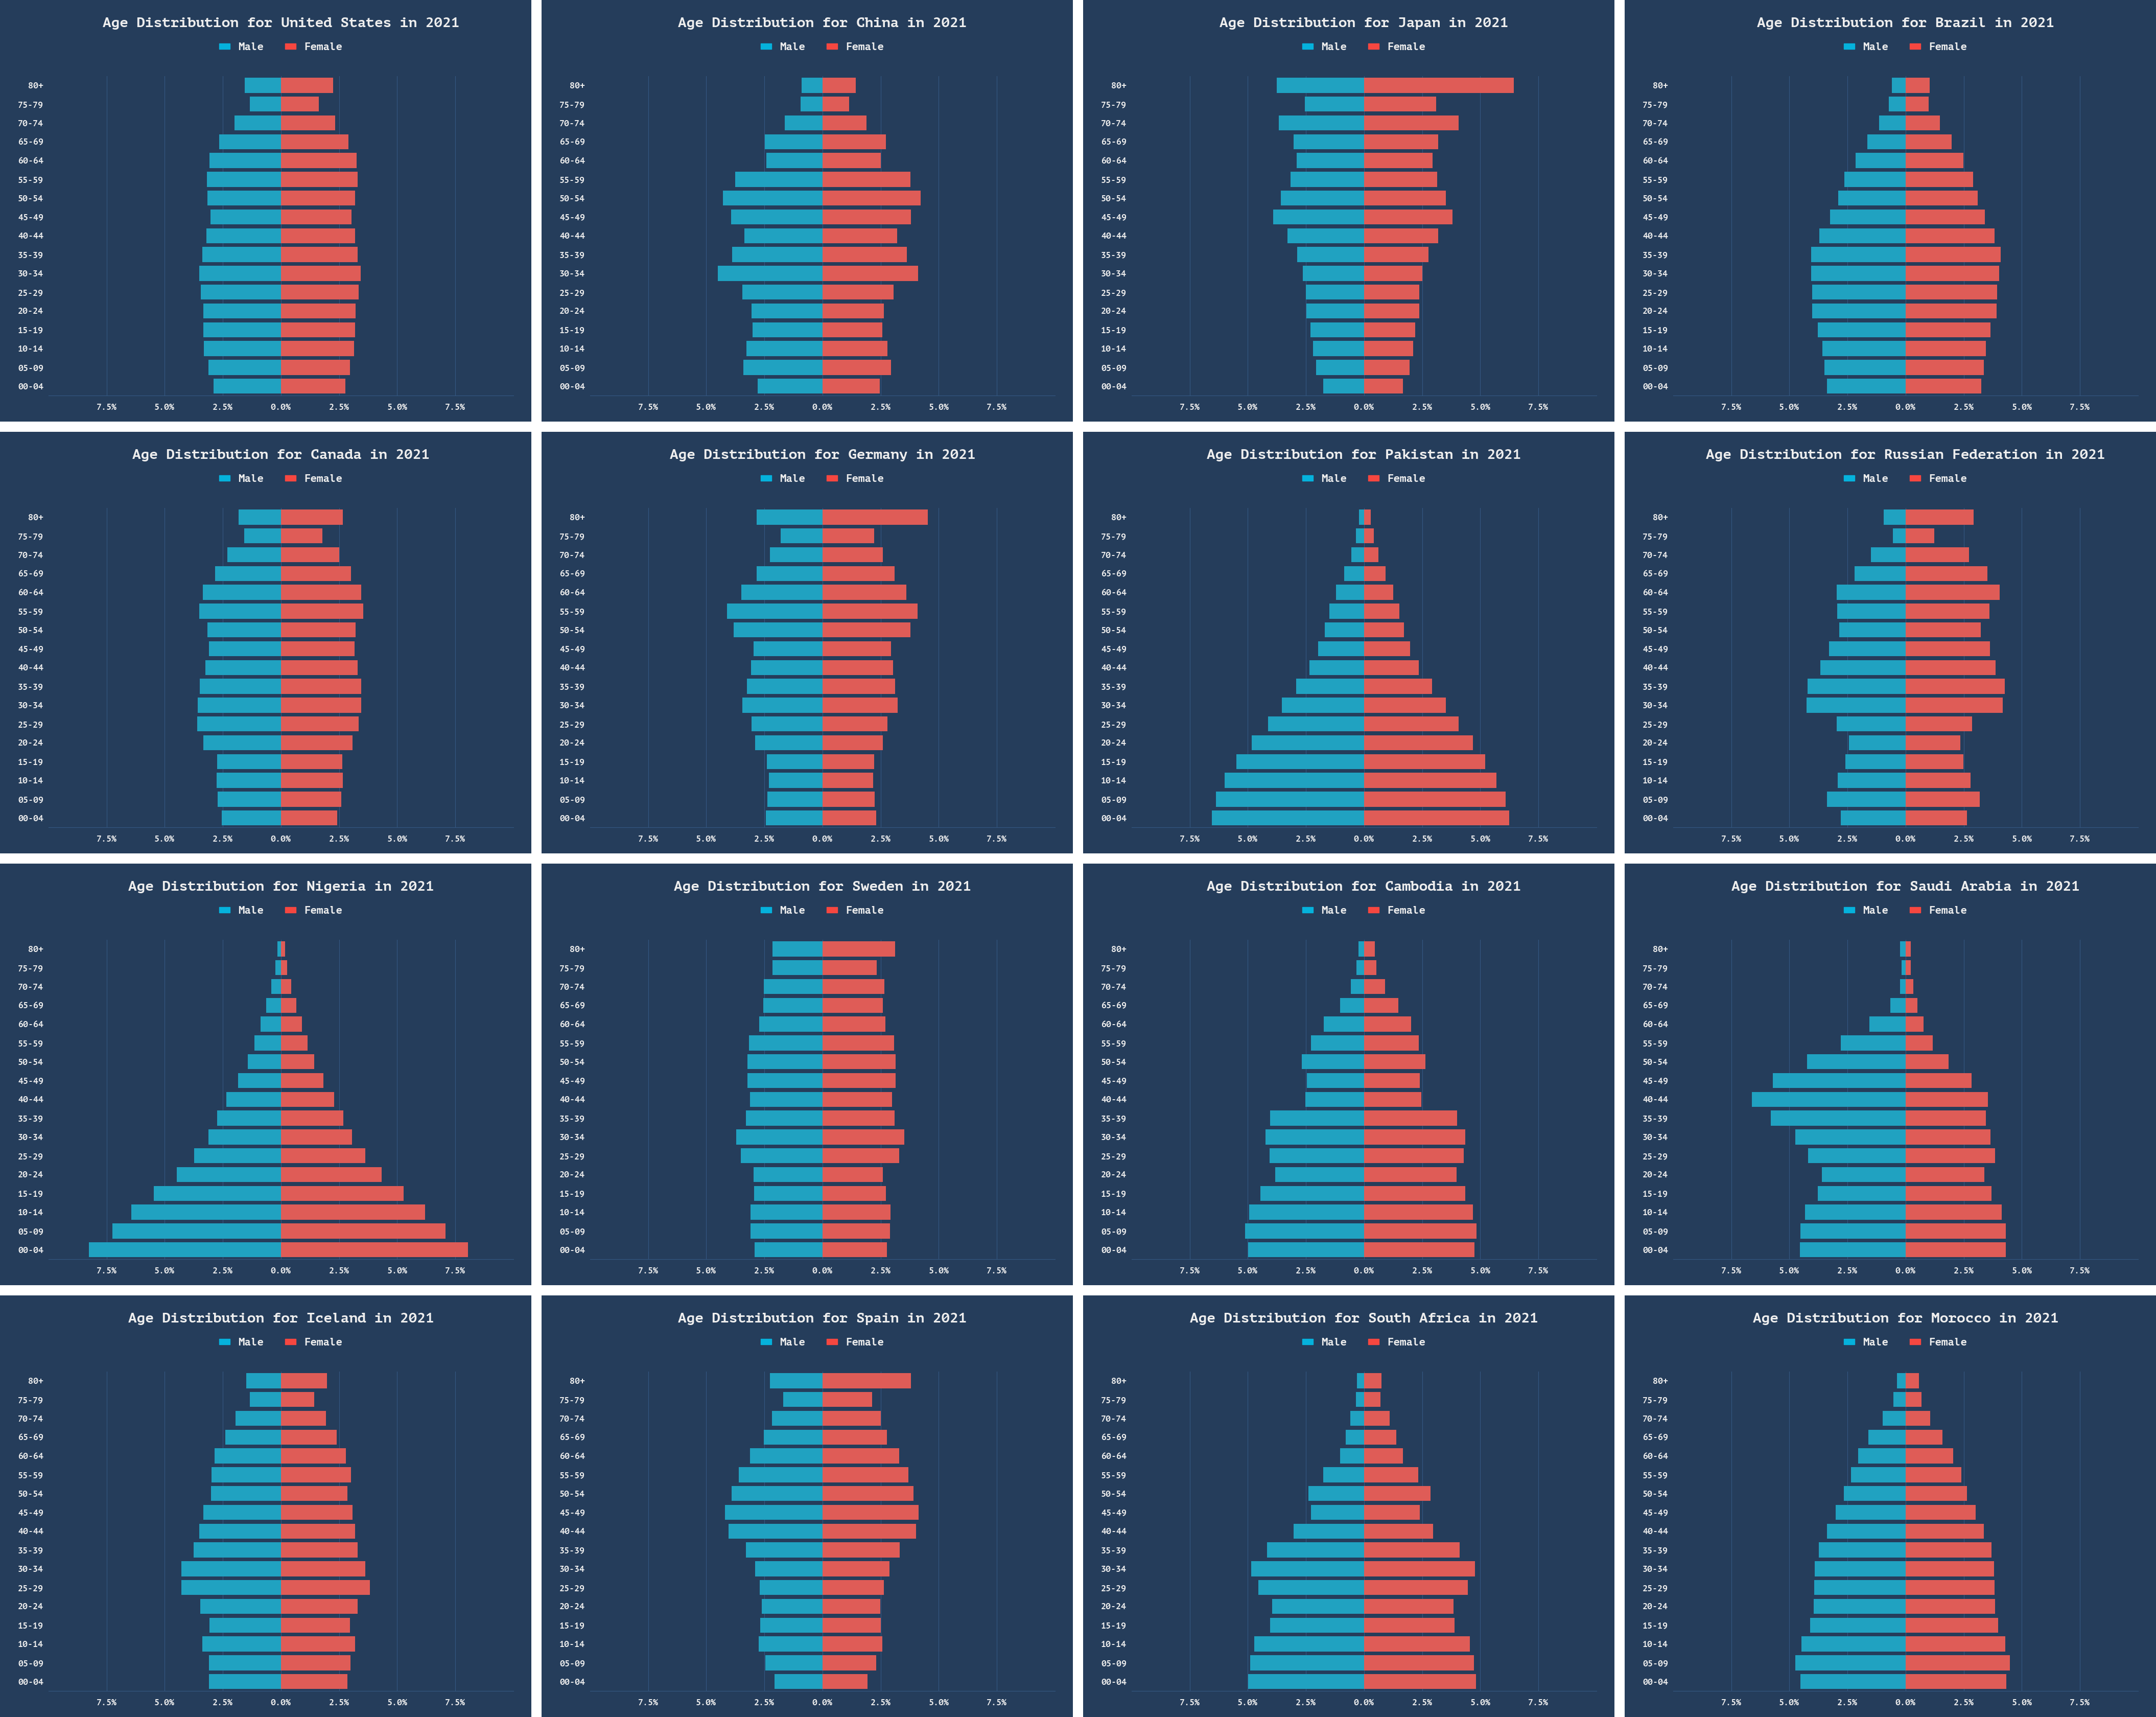

In [21]:
grid

## Creating a time-lapse visualization

In [22]:
images = []
years = list(population_male.columns[4:])

for year in years:
    fig = plt.figure(figsize=(10, 8))

    ax = create_age_distribution(
        female_df=population_female,
        male_df=population_male,
        country="World",
        year=year
    )

    # New functions
    format_ticks(ax, xformat="millions", xlim=(-400000000, 400000000))
    add_legend(x=0.5, y=1.09)
    plt.title("Age Distribution for the World in      ", y=1.14, fontsize=21)
    plt.text(x=0.77, y=1.15, s=str(year), fontsize=21, transform=ax.transAxes)

    image = create_image_from_figure(fig)
    image = add_padding_to_chart(image, 20, 20, 20, 5, background_color)
    images.append(image)

In [23]:
images = images + [images[-1] for _ in range(20)]
imageio.mimwrite('./time-lapse.gif', images, duration=0.15)